В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



Посилання на файл в репозиторії
https://github.com/Anna-Nesterenk/Course-Machine-Learning-for-people-HW-/blob/main/process_bank_churn.py

In [1]:
from process_bank_churn import preprocess_data

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.tree import plot_tree, export_text

In [3]:
raw_df = pd.read_csv('train.csv')

In [4]:
data = preprocess_data(raw_df, scaler_numeric = False)

X_train = data['X_train']
train_targets = data['train_targets']
X_val = data['X_val']
val_targets = data['val_targets']

In [5]:
#тренуємо модель
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, train_targets)

DecisionTreeClassifier(random_state=42)

Area under ROC score on Train dataset: 1.00%


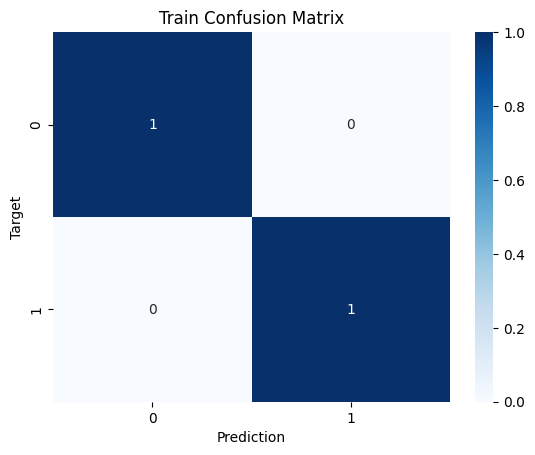

Area under ROC score on Validation dataset: 0.78%


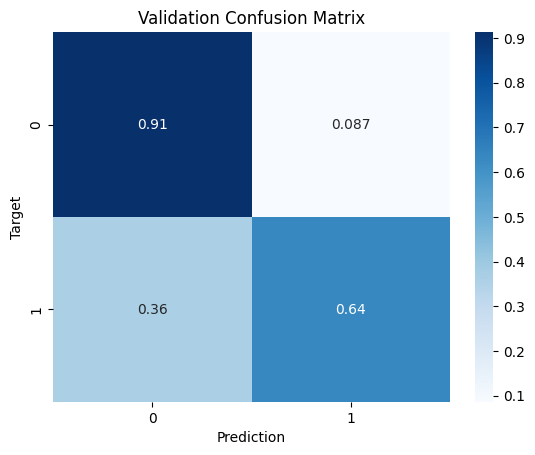

In [6]:
#виводимо rea under ROC на трейн і валідаційних даних
def predict_and_plot(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    fpr, tpr, thresholds = roc_curve(targets, preds)
    roc_auc = auc(fpr, tpr)
    print(f"Area under ROC score on {name} dataset: {roc_auc:.2f}%")
    confusion_matrix_ = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(confusion_matrix_, annot=True, cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    plt.show()
    return preds

# Оцінюємо модель на трен і вал даних
train_preds = predict_and_plot(model, X_train, train_targets, 'Train')
val_preds = predict_and_plot(model, X_val, val_targets, 'Validation')

Із отриманих результатів бачимо, що наша модель перетренована (rea under ROC на трейн даних вище ніж на валідаційних)

In [7]:
#визначаємо глибину натренованого дерева
print("Глибина дерева:", model.tree_.max_depth)

Глибина дерева: 24


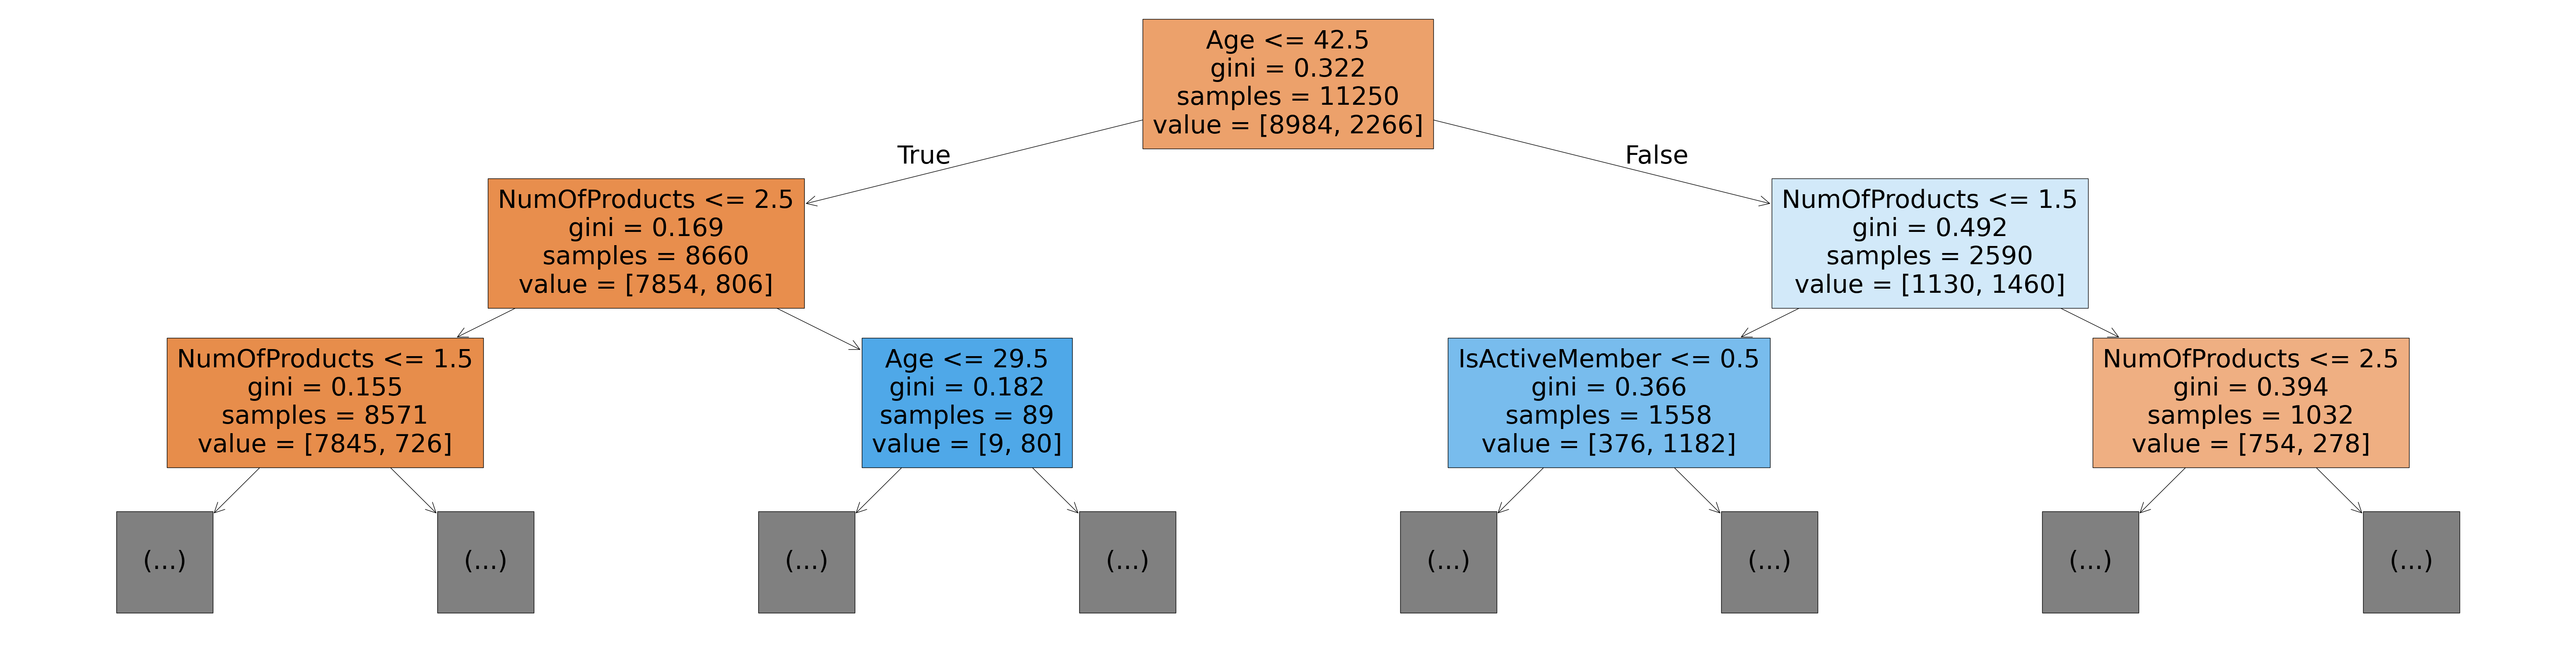

In [8]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True);

З отриманих результатів бачимо, що найвпливовішими ознаками дерево визначило `Age`, `NumOfProducts`, `IsActiveMember`

In [9]:
#побудуємо таблицю ТОП-10 найвпливовіших ознак
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

importance_df.head(10)

,feature,importance
1,Age,0.340487
4,NumOfProducts,0.186981
7,EstimatedSalary,0.126969
0,CreditScore,0.108312
3,Balance,0.082685
2,Tenure,0.054056
6,IsActiveMember,0.036119
9,Geography_Germany,0.020091
5,HasCrCard,0.014719
11,Gender_Female,0.009158


**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

In [10]:
#пишемо функцію для автоматизації подальших розрахунків
def predict_and_plot_t(inputs, targets, name='', max_leaf_nodes=None, max_depth=None):
    model = DecisionTreeClassifier(random_state=42, max_leaf_nodes=max_leaf_nodes, max_depth=max_depth).fit(inputs, targets)
    preds = model.predict(inputs)
    fpr, tpr, thresholds = roc_curve(targets, preds)
    roc_auc = auc(fpr, tpr)
    print(f"Area under ROC score on {name, max_leaf_nodes,max_depth } dataset: {roc_auc:.2f}%")
    return preds

Тестуємо різні варіації параметрів `max_leaf_nodes` та `max_depth` для покращення моделі

In [11]:
#експерементуємо на трейні
leaf_6_depth_3_tr = predict_and_plot_t(X_train, train_targets, 'Train', max_leaf_nodes=6, max_depth=3)
leaf_14_depth_6_tr = predict_and_plot_t(X_train, train_targets, 'Train', max_leaf_nodes=14, max_depth=6)
leaf_18_depth_10_tr = predict_and_plot_t(X_train, train_targets, 'Train', max_leaf_nodes=18, max_depth=10)
leaf_25_depth_20_tr = predict_and_plot_t(X_train, train_targets, 'Train', max_leaf_nodes=25, max_depth=20)

Area under ROC score on ('Train', 6, 3) dataset: 0.78%
Area under ROC score on ('Train', 14, 6) dataset: 0.80%
Area under ROC score on ('Train', 18, 10) dataset: 0.82%
Area under ROC score on ('Train', 25, 20) dataset: 0.83%


На трейнових даних спостерігаємо підвищення Area under ROC score при збільшення глибини дерева. Можливо, це показник перенавчання. Протестуємо ті самі парметри на валідаційній вибірці

In [12]:
#експерементуємо на валідації
leaf_6_depth_3_val = predict_and_plot_t(X_val, val_targets, 'Validation', max_leaf_nodes=6, max_depth=3)
leaf_14_depth_6_val = predict_and_plot_t(X_val, val_targets, 'Validation', max_leaf_nodes=14, max_depth=6)
leaf_18_depth_10_val = predict_and_plot_t(X_val, val_targets, 'Validation', max_leaf_nodes=18, max_depth=10)
leaf_25_depth_20_val = predict_and_plot_t(X_val, val_targets, 'Validation', max_leaf_nodes=25, max_depth=20)

Area under ROC score on ('Validation', 6, 3) dataset: 0.72%
Area under ROC score on ('Validation', 14, 6) dataset: 0.81%
Area under ROC score on ('Validation', 18, 10) dataset: 0.80%
Area under ROC score on ('Validation', 25, 20) dataset: 0.81%


Бачимо, що на валідаційній вибірці  Area under ROC score  також показує вищі значення при збільшенні глибини дерева, але не так стрімко.

Найкращий результат на двох вибірках спостерігаємо при `max_leaf_nodes=14, max_depth=6`

In [13]:
leaf_14_depth_6_tr = predict_and_plot_t(X_train, train_targets, 'Train', max_leaf_nodes=14, max_depth=6)
leaf_14_depth_6_val = predict_and_plot_t(X_val, val_targets, 'Validation', max_leaf_nodes=14, max_depth=6)

Area under ROC score on ('Train', 14, 6) dataset: 0.80%
Area under ROC score on ('Validation', 14, 6) dataset: 0.81%


**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [14]:
def max_depth_error(md):
    model = DecisionTreeClassifier(max_depth=md, random_state=42)
    model.fit(X_train, train_targets)
    train_error = 1 - model.score(X_train, train_targets)
    val_error = 1 - model.score(X_val, val_targets)
    return {'Max Depth': md, 'Training Error': train_error, 'Validation Error': val_error}

In [15]:
errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])
errors_df.style.background_gradient(subset='Validation Error', cmap='Blues_r')

,Max Depth,Training Error,Validation Error
0,1,0.172089,0.182133
1,2,0.123467,0.140533
2,3,0.113244,0.131733
3,4,0.112978,0.130933
4,5,0.104622,0.121600
5,6,0.096889,0.117867
6,7,0.089422,0.112533
7,8,0.084889,0.113600
8,9,0.076178,0.115200
9,10,0.067111,0.120267


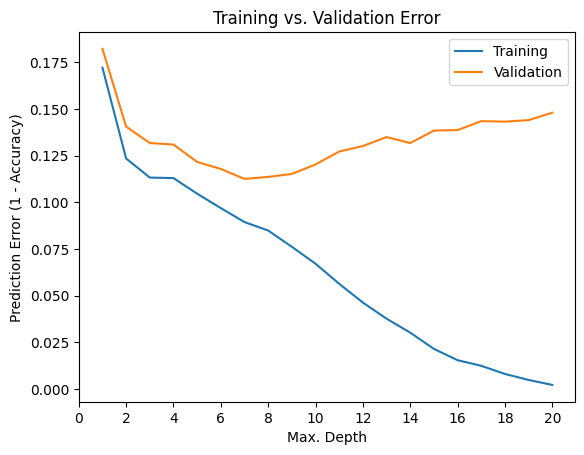

In [16]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training Error'])
plt.plot(errors_df['Max Depth'], errors_df['Validation Error'])
plt.title('Training vs. Validation Error')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('Prediction Error (1 - Accuracy)')
plt.legend(['Training', 'Validation']);

На основі отриманих даних бачимо, що найкращих результатів модель досягає при `max_depth = 7`

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [17]:
#тренуємо модель
model_f= DecisionTreeClassifier(random_state=42,  max_depth=7)
model_f.fit(X_train, train_targets)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [18]:
new_df = pd.read_csv('test.csv')

In [19]:
from process_bank_churn import preprocess_new_data

In [20]:
X_test = preprocess_new_data(new_df, scaler_numeric = False)
X_test_ = X_test.drop('id', axis=1)

In [21]:
test_preds = model_f.predict(X_test_)

In [22]:
# Перетворюємо масив в Series
test_preds_df = pd.DataFrame()
test_preds_df = test_preds_df.assign(Exited=test_preds)

# Об'єднуємо DataFrame и Series
Final = pd.concat([X_test, test_preds_df], axis=1)

#залишаємо для завантаження на Kaggle лише CustomerId і Exited
Final = Final[['id', 'Exited']]
Final

,id,Exited
0,15000,0.0
1,15001,0.0
2,15002,0.0
3,15003,1.0
4,15004,0.0
...,...,...
9995,24995,0.0
9996,24996,0.0
9997,24997,0.0
9998,24998,0.0


In [23]:
Final.to_csv('submission.csv', index=False)

Мій Score на Leaderbord


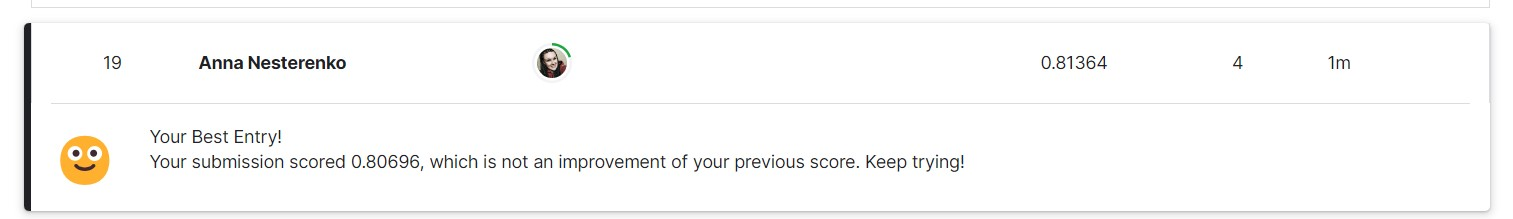

In [24]:
from IPython.display import Image
print('Мій Score на Leaderbord')
Image("Screenshot_1.jpg", width=1320, height=1240) 